# Team ID : PNT2022TMID08626

# Importing the required library

In [ ]:
import tensorflow

In [4]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential# stack for layers
from tensorflow.keras import layers#input,middle and output layers forcnn structure
from tensorflow.keras.layers import Dense,Flatten#dense and flatten layers
from tensorflow.keras.layers import Conv2D#convolutional layers
from tensorflow import keras#library for building neural networks built on tensorflow
from tensorflow.keras.optimizers import Adam#optimizers
from keras.utils import np_utils

# Loading the data

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


# Analyzing the data

In [8]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[5]

2

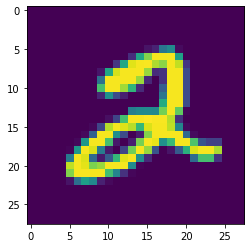

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

# Reshaping the data

In [11]:
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

In [12]:
print ("Shape of X_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


# Applying one Hotencoding

convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout

# Adding CNN layer

In [16]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))


# Compile the model

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

# Train the model

In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.2600 - accuracy: 0.9511 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0719 - accuracy: 0.9785 - val_loss: 0.0950 - val_accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.0900 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 0.1050 - val_accuracy: 0.9747
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0842 - val_accuracy: 0.9820


# Observing the metrices

In [19]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.08420193940401077, 0.9819999933242798]


# Test the model

In [20]:
prediction=model.predict(x_test[:5])
print(prediction)

1/1 [==============================] - 0s 84ms/step
[[4.0351332e-13 4.6145593e-15 7.9426864e-12 3.6988692e-07 1.2474837e-18
  5.0288202e-13 9.9698470e-20 9.9999964e-01 1.4521950e-09 5.5775353e-09]
 [2.0407164e-11 2.9936387e-10 1.0000000e+00 1.5163411e-14 6.8775140e-22
  1.0346708e-17 3.6543427e-10 1.4415800e-19 4.9613288e-14 4.5817813e-21]
 [3.4889942e-12 9.9998963e-01 6.7495657e-06 5.2625865e-15 1.2803760e-07
  1.8978109e-10 5.0176570e-09 2.6155569e-10 3.4661741e-06 5.3021099e-12]
 [1.0000000e+00 4.0936742e-15 2.1811340e-10 1.5707134e-16 4.3095729e-14
  2.9080857e-12 7.7849167e-09 1.4526050e-10 7.3599512e-12 9.0574536e-12]
 [1.0947845e-14 1.1511424e-11 4.0602462e-18 9.3403068e-18 1.0000000e+00
  7.6617902e-18 1.4756050e-16 2.2480922e-14 2.9495194e-11 1.7560243e-09]]


In [22]:
import numpy as np

In [23]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [24]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Save the model

In [25]:
model.save('models/mnistcnn.h5')